# Prep Notebook, Week 13/15 -- Altair stuffs

So, the last lecture we ended passing data through Python to Altair to output as vega-lite.  What is the benefit to using Python for data analysis?  Well, for some of us Python is our bestie and so we want to hang out with it the most.  For others, the benefit is that we can do data cleaning in Python and then put the cleaned data into our plots.

Last time we worked though an example with the buildings dataset, now we'll do a more complex example with the corgi's dataset.

In [3]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt # just in case

In [4]:
myJekyllDir = '/Users/jnaiman/jnaiman.github.io/'

## Corgis Dataset examples

Let's start by reading in this dataset and taking a look -- we'll start with the number of corgis born over time:

In [5]:
corgs = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/corgs_per_country_over_time_columns_2020.csv')

In [6]:
corgs.head()

,Years,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
0,1917,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So, this shows the number of corgis born over time in different countries.  The easiest plot we can think of is probably a line chart of each country over time.  First, let's start with the United States:

In [7]:
linecorg = alt.Chart(corgs).mark_line().encode(
    alt.X('Years:Q'),
    alt.Y('United States:Q')
)
linecorg

alt.Chart(...)

Here again, we probably want to specify that we have time units:

In [8]:
corgs['Years'] = pd.to_datetime(corgs['Years'].astype('int'), format='%Y')

In [9]:
corgs

,Years,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
0,1917-01-01,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1918-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1919-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1920-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1921-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2016-01-01,229,0,217,2,0,54,55,28,2,...,8,3,0,9,0,0,0,27,17,72
100,2017-01-01,213,0,260,2,1,28,60,10,4,...,4,3,0,0,2,0,0,8,25,101
101,2018-01-01,198,0,329,0,3,42,25,5,2,...,6,3,0,0,0,0,0,16,12,56
102,2019-01-01,118,0,189,0,0,30,62,1,2,...,0,0,0,0,0,0,0,16,12,51


In [10]:
linecorg = alt.Chart(corgs).mark_line().encode(
    alt.X('Years:T'),
    alt.Y('United States:Q')
)
linecorg

alt.Chart(...)

That looks better!  To make multiple lines for each country, we want to probably use the `melt` operation we did before. To do that, we need to make years the index:

In [11]:
corgs = corgs.set_index('Years')
corgs.head()

,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,South Africa,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
Years,,,,,,,,,,,,,,,,,,,,,
1917-01-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1918-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1920-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1921-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can "melt" like before:

In [12]:
corg_source = corgs.reset_index().melt('Years', 
                                      var_name='Country', value_name='country')

In [13]:
corg_source.head()

,Years,Country,country
0,1917-01-01,United States,0
1,1918-01-01,United States,0
2,1919-01-01,United States,0
3,1920-01-01,United States,0
4,1921-01-01,United States,0


Now, let's try again with our multi-line plot:

In [14]:
linecorg = alt.Chart(corg_source).mark_line().encode(
    alt.Y('country:Q'),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

Since there is a large range of corgis born, we might try a log-scale on the y-axis:

In [15]:
linecorg = alt.Chart(corg_source).mark_line().encode(
    alt.Y('country:Q',scale=alt.Scale(type='log')),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

Here we see that there is an issue -- this is probably because there are zeros in our dataset:

In [16]:
corg_source['country'].min()

0

Potentially, we can "clean" these by setting any zeros to NaN's, however in this case those 0's are meaningful -- they are telling us that a particular country has no corgis born in that year!  Instead, we have a few different options.  One thing we can do [is apply a](https://stackoverflow.com/questions/58032074/why-is-altair-returning-an-empty-chart-when-using-log-scale) [filter opperation](https://altair-viz.github.io/user_guide/transform/filter.html#filter-transform) on our data:

In [17]:
linecorg = alt.Chart(corg_source).transform_filter(
    alt.datum.country > 0
).mark_line().encode(
    alt.Y('country:Q',scale=alt.Scale(type='log')),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

This doesn't really get to our issue though -- we are just filtering out those zero years/countries.  In this case, instead of filtering, we probably want to use a symmetric log instead of a log for our scale;

In [18]:
linecorg = alt.Chart(corg_source).mark_line().encode(
    alt.Y('country:Q',scale=alt.Scale(type='symlog')),
    x='Years:T',
    color='Country:N'
)
linecorg

alt.Chart(...)

Even with this though, we have sort of a messy plot -- even if we allowed for selections (like with the buildings dataset above) we still have many lines that "fall off" our legend which is not helpful.

Since this is data in different countries, we could think that maybe a good idea would be some kind of map!

First, let's see what mappable data "comes with" vega-datasets:

In [19]:
from vega_datasets import data

In [20]:
#data.countries

In [21]:
data.world_110m

Let's try plotting both of these:

In [22]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!
world

alt.Chart(...)

So, one way we can plot data on this plot is to plot dots over each of the countries showing how many corgis have been born in each one.  For this though [we probably need the latitude and longitude points](https://altair-viz.github.io/altair-tutorial/notebooks/09-Geographic-plots.html).

One way to do this is [using the OpenStreetMap project](https://gis.stackexchange.com/questions/212796/getting-latlon-extent-of-country-by-its-name-using-python):

In [23]:
import requests
def get_boundingbox_country(country, output_as='center'):
    """
    get the bounding box of a country in EPSG4326 given a country name

    Parameters
    ----------
    country : str
        name of the country in english and lowercase
    output_as : 'str
        chose from 'boundingbox' or 'center'. 
         - 'boundingbox' for [latmin, latmax, lonmin, lonmax]
         - 'center' for [latcenter, loncenter]

    Returns
    -------
    output : list
        list with coordinates as str
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',
                             country,
                             '&format=json&polygon=0')
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
    return output

We can call OpenStreetMaps in a few different ways, with country codes or names:

In [24]:
lat,long = get_boundingbox_country('usa')
lat,long

(39.7837304, -100.445882)

In [25]:
lat,long = get_boundingbox_country('us')
lat,long

(39.7837304, -100.445882)

In [26]:
lat,long = get_boundingbox_country('United States')
lat,long

(39.7837304, -100.445882)

There is no guarantee that the dataset is formatted with the correct country codes -- so we'd best check and see:

In [27]:
corgs.columns

Index(['United States', 'Brazil', 'Russia', 'Japan', 'Vietnam', 'Germany',
       'France', 'United Kingdom', 'Italy', 'South Africa', 'Ukraine', 'Spain',
       'Poland', 'Canada', 'Korea, North', 'Romania', 'Australia', 'Portugal',
       'Belgium', 'Czech Republic', 'Hungary', 'Belarus', 'Sweden', 'Austria',
       'Switzerland', 'Israel', 'Serbia', 'Denmark', 'Finland', 'Norway',
       'Croatia', 'New Zealand', 'Ireland', 'Lithuania', 'Uruguay', 'Latvia',
       'Slovenia', 'Estonia', 'Netherlands Antilles', 'Kosovo'],
      dtype='object')

In [28]:
lat,long = [],[]
for c in corgs.columns:
    la,lo = get_boundingbox_country(str(c))
    print(c,la,lo)
    lat.append(la); long.append(lo)

United States 39.7837304 -100.445882
Brazil -10.3333333 -53.2
Russia 64.6863136 97.7453061
Japan 36.5748441 139.2394179
Vietnam 15.9266657 107.9650855
Germany 51.1638175 10.4478313
France 46.603354 1.8883335
United Kingdom 54.7023545 -3.2765753
Italy 42.6384261 12.674297
South Africa -28.8166236 24.991639
Ukraine 49.4871968 31.2718321
Spain 39.3260685 -4.8379791
Poland 52.215933 19.134422
Canada 61.0666922 -107.991707


IndexError: list index out of range

Ah ha!  We have an issue, let's see what it is:

In [29]:
c

'Korea, North'

In this case, we need to do some data cleaning.  We can start from our "source" but instead, we probably want to start from the original dataframe, just to be consistent:

In [30]:
corg_clean = corgs.copy()
#corg_clean = corg_clean.set_index('Years') # note -- don't have to do this again since we started with a rest index
corg_clean = corg_clean.rename(columns={'Korea, North':"North Korea"})
corg_clean.head()

,United States,Brazil,Russia,Japan,Vietnam,Germany,France,United Kingdom,Italy,South Africa,...,Croatia,New Zealand,Ireland,Lithuania,Uruguay,Latvia,Slovenia,Estonia,Netherlands Antilles,Kosovo
Years,,,,,,,,,,,,,,,,,,,,,
1917-01-01,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1918-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1919-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1920-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1921-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's try this again:

In [31]:
lat,long = [],[]
for c in corg_clean.columns:
    la,lo = get_boundingbox_country(str(c))
    print(c,la,lo)
    lat.append(la); long.append(lo)

United States 39.7837304 -100.445882
Brazil -10.3333333 -53.2
Russia 64.6863136 97.7453061
Japan 36.5748441 139.2394179
Vietnam 15.9266657 107.9650855
Germany 51.1638175 10.4478313
France 46.603354 1.8883335
United Kingdom 54.7023545 -3.2765753
Italy 42.6384261 12.674297
South Africa -28.8166236 24.991639
Ukraine 49.4871968 31.2718321
Spain 39.3260685 -4.8379791
Poland 52.215933 19.134422
Canada 61.0666922 -107.991707
North Korea 40.3736611 127.0870417
Romania 45.9852129 24.6859225
Australia -24.7761086 134.755
Portugal 39.6621648 -8.1353519
Belgium 50.6402809 4.6667145
Czech Republic 49.7439047 15.3381061
Hungary 47.1817585 19.5060937
Belarus 53.4250605 27.6971358
Sweden 59.6749712 14.5208584
Austria 47.59397 14.12456
Switzerland 46.7985624 8.2319736
Israel 30.8124247 34.8594762
Serbia 44.1534121 20.55144
Denmark 55.670249 10.3333283
Finland 63.2467777 25.9209164
Norway 60.5000209 9.0999715
Croatia 45.5643442 17.0118954
New Zealand -41.5000831 172.8344077
Ireland 52.865196 -7.9794599


IndexError: list index out of range

In [32]:
c

'Netherlands Antilles'

Found another one:

In [33]:
corg_clean = corgs.copy()
corg_clean = corg_clean.rename(columns={'Korea, North':"North Korea",'Netherlands Antilles':"Netherlands"})

In [34]:
lat,long = [],[]
for c in corg_clean.columns:
    la,lo = get_boundingbox_country(str(c))
    print(c,la,lo)
    lat.append(la); long.append(lo)

United States 39.7837304 -100.445882
Brazil -10.3333333 -53.2
Russia 64.6863136 97.7453061
Japan 36.5748441 139.2394179
Vietnam 15.9266657 107.9650855
Germany 51.1638175 10.4478313
France 46.603354 1.8883335
United Kingdom 54.7023545 -3.2765753
Italy 42.6384261 12.674297
South Africa -28.8166236 24.991639
Ukraine 49.4871968 31.2718321
Spain 39.3260685 -4.8379791
Poland 52.215933 19.134422
Canada 61.0666922 -107.991707
North Korea 40.3736611 127.0870417
Romania 45.9852129 24.6859225
Australia -24.7761086 134.755
Portugal 39.6621648 -8.1353519
Belgium 50.6402809 4.6667145
Czech Republic 49.7439047 15.3381061
Hungary 47.1817585 19.5060937
Belarus 53.4250605 27.6971358
Sweden 59.6749712 14.5208584
Austria 47.59397 14.12456
Switzerland 46.7985624 8.2319736
Israel 30.8124247 34.8594762
Serbia 44.1534121 20.55144
Denmark 55.670249 10.3333283
Finland 63.2467777 25.9209164
Norway 60.5000209 9.0999715
Croatia 45.5643442 17.0118954
New Zealand -41.5000831 172.8344077
Ireland 52.865196 -7.9794599


Hurray!  So, this is a case where being able to clean the data in Python was super useful.  Let's try adding these as points to our map now that we have cleaned data.

One other data transformation we probably want to do is transpose this matrix so that we have countries as rows and corgis born per year as columns:

In [35]:
corg_clean_t = corg_clean.T
corg_clean_t.head()

Years,1917-01-01,1918-01-01,1919-01-01,1920-01-01,1921-01-01,1922-01-01,1923-01-01,1924-01-01,1925-01-01,1926-01-01,...,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
United States,0,0,0,0,0,0,0,0,0,0,...,408,431,376,280,301,229,213,198,118,2
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Russia,0,0,0,0,0,0,0,0,0,0,...,89,82,115,127,237,217,260,329,189,16
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


Since, technically, the index is no longer years, so we should be sure to name the index more intuatively: 

In [36]:
corg_clean_t.index.name = "Country"

In [37]:
corg_clean_t.axes[1].name

'Years'

In [38]:
corg_clean_t.head()

Years,1917-01-01,1918-01-01,1919-01-01,1920-01-01,1921-01-01,1922-01-01,1923-01-01,1924-01-01,1925-01-01,1926-01-01,...,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,408,431,376,280,301,229,213,198,118,2
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Russia,0,0,0,0,0,0,0,0,0,0,...,89,82,115,127,237,217,260,329,189,16
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


Now we can add in the lat/long for each country:

In [39]:
corg_clean_t['Latitude'] = lat
corg_clean_t['Longitude'] = long

In [40]:
corg_clean_t.head()

Years,1917-01-01 00:00:00,1918-01-01 00:00:00,1919-01-01 00:00:00,1920-01-01 00:00:00,1921-01-01 00:00:00,1922-01-01 00:00:00,1923-01-01 00:00:00,1924-01-01 00:00:00,1925-01-01 00:00:00,1926-01-01 00:00:00,...,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,376,280,301,229,213,198,118,2,39.783730,-100.445882
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-10.333333,-53.200000
Russia,0,0,0,0,0,0,0,0,0,0,...,115,127,237,217,260,329,189,16,64.686314,97.745306
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,0,0,0,36.574844,139.239418
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,0,15.926666,107.965086


Now (finally) we can plot those points on our map using just the lat/long:

In [41]:
corg_subset = corg_clean_t.reset_index()[['Country','Latitude','Longitude']]
corg_subset.head()

Years,Country,Latitude,Longitude
0,United States,39.783730,-100.445882
1,Brazil,-10.333333,-53.200000
2,Russia,64.686314,97.745306
3,Japan,36.574844,139.239418
4,Vietnam,15.926666,107.965086


In [42]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.value(100),
    tooltip='Country'
)

world + points

alt.LayerChart(...)

We probably want the size of the dot to be proportional to the actual number of corgis born.

To start, let's just plot the total corgis born in a country:

In [43]:
corg_clean_t.loc[:, (corg_clean_t.columns != 'Longitude') & (corg_clean_t.columns != "Latitude")].head()

Years,1917-01-01,1918-01-01,1919-01-01,1920-01-01,1921-01-01,1922-01-01,1923-01-01,1924-01-01,1925-01-01,1926-01-01,...,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,408,431,376,280,301,229,213,198,118,2
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Russia,0,0,0,0,0,0,0,0,0,0,...,89,82,115,127,237,217,260,329,189,16
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


Now we can sum along the Country axis:

In [44]:
corg_clean_t.loc[:, (corg_clean_t.columns != 'Longitude') & (corg_clean_t.columns != "Latitude")].sum(axis=1)

Country
United States     16130
Brazil                1
Russia             1834
Japan                 7
Vietnam               4
Germany             892
France              597
United Kingdom     2649
Italy               106
South Africa         28
Ukraine              19
Spain                 5
Poland              859
Canada              391
North Korea           5
Romania               7
Australia           891
Portugal              7
Belgium             110
Czech Republic      271
Hungary               8
Belarus              38
Sweden             2008
Austria              29
Switzerland          30
Israel               32
Serbia                2
Denmark            2176
Finland            4051
Norway             1077
Croatia              21
New Zealand        1097
Ireland              29
Lithuania            29
Uruguay               2
Latvia                3
Slovenia              1
Estonia              97
Netherlands         536
Kosovo              649
dtype: int64

In [45]:
corg_clean_t['Total Corg'] = corg_clean_t.loc[:, (corg_clean_t.columns != 'Longitude') & (corg_clean_t.columns != "Latitude")].sum(axis=1).values

In [46]:
corg_clean_t.head()

Years,1917-01-01 00:00:00,1918-01-01 00:00:00,1919-01-01 00:00:00,1920-01-01 00:00:00,1921-01-01 00:00:00,1922-01-01 00:00:00,1923-01-01 00:00:00,1924-01-01 00:00:00,1925-01-01 00:00:00,1926-01-01 00:00:00,...,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,Latitude,Longitude,Total Corg
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,280,301,229,213,198,118,2,39.783730,-100.445882,16130
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-10.333333,-53.200000,1
Russia,0,0,0,0,0,0,0,0,0,0,...,127,237,217,260,329,189,16,64.686314,97.745306,1834
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,0,0,0,36.574844,139.239418,7
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,0,0,15.926666,107.965086,4


Let's again subset our data:

In [47]:
corg_subset2 = corg_clean_t.reset_index()[['Country','Latitude','Longitude','Total Corg']]

In [48]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset2).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Total Corg:Q'),
    tooltip='Country',
)

world + points

alt.LayerChart(...)

By default, we see that there is some scale applied to the points where there are some that are very small.  Let's see if we can mess with this:

In [49]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset2).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Total Corg:Q',scale=None),
    tooltip='Country',
)

world + points

alt.LayerChart(...)

Whoa!  Now that seems to have gone the other way!  Now we have so many overlapping points that its hard to see in "high corgi" areas like the UK.  Let's try a log scale:

In [50]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='gray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset2).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Total Corg:Q',scale=alt.Scale(type='log')),
    tooltip='Country',
)

world + points

alt.LayerChart(...)

Hey that looks better!  Though, that blue is a bit hard to see, let's try messing with the colors:

In [51]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_subset2).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    size=alt.Size('Total Corg:Q',scale=alt.Scale(type='log')),
    tooltip='Country',
)

world + points

alt.LayerChart(...)

Neat!  Now, wouldn't it be fun if we could see those data points "grow" over time.  Let's look at our dataframe again:

In [52]:
corg_clean_t.head()

Years,1917-01-01 00:00:00,1918-01-01 00:00:00,1919-01-01 00:00:00,1920-01-01 00:00:00,1921-01-01 00:00:00,1922-01-01 00:00:00,1923-01-01 00:00:00,1924-01-01 00:00:00,1925-01-01 00:00:00,1926-01-01 00:00:00,...,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,Latitude,Longitude,Total Corg
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,280,301,229,213,198,118,2,39.783730,-100.445882,16130
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-10.333333,-53.200000,1
Russia,0,0,0,0,0,0,0,0,0,0,...,127,237,217,260,329,189,16,64.686314,97.745306,1834
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,0,0,0,36.574844,139.239418,7
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,0,0,15.926666,107.965086,4


Instead of total corgs overall, what we really want is total corgs over time. Luckily, our columns are in the correct date order:

In [53]:
corg_clean2 = corg_clean_t.loc[:,(corg_clean_t.columns != 'Total Corg')].copy()
corg_clean2.head()

Years,1917-01-01 00:00:00,1918-01-01 00:00:00,1919-01-01 00:00:00,1920-01-01 00:00:00,1921-01-01 00:00:00,1922-01-01 00:00:00,1923-01-01 00:00:00,1924-01-01 00:00:00,1925-01-01 00:00:00,1926-01-01 00:00:00,...,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,376,280,301,229,213,198,118,2,39.783730,-100.445882
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-10.333333,-53.200000
Russia,0,0,0,0,0,0,0,0,0,0,...,115,127,237,217,260,329,189,16,64.686314,97.745306
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,0,0,0,36.574844,139.239418
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,0,15.926666,107.965086


In [54]:
corg_clean2.loc[:,(corg_clean2.columns != 'Latitude') & (corg_clean2.columns!='Longitude')].head()

Years,1917-01-01,1918-01-01,1919-01-01,1920-01-01,1921-01-01,1922-01-01,1923-01-01,1924-01-01,1925-01-01,1926-01-01,...,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,408,431,376,280,301,229,213,198,118,2
Brazil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Russia,0,0,0,0,0,0,0,0,0,0,...,89,82,115,127,237,217,260,329,189,16
Japan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


In [55]:
corg_clean2.loc[:,(corg_clean2.columns != 'Latitude') & (corg_clean2.columns!='Longitude')].cumsum(axis=1)

Years,1917-01-01,1918-01-01,1919-01-01,1920-01-01,1921-01-01,1922-01-01,1923-01-01,1924-01-01,1925-01-01,1926-01-01,...,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,13982,14413,14789,15069,15370,15599,15812,16010,16128,16130
Brazil,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Russia,0,0,0,0,0,0,0,0,0,0,...,262,344,459,586,823,1040,1300,1629,1818,1834
Japan,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,5,7,7,7,7
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,4,4,4
Germany,0,0,0,0,0,0,0,0,0,0,...,428,508,589,666,738,792,820,862,892,892
France,0,0,0,0,0,0,0,0,0,0,...,276,302,338,375,395,450,510,535,597,597
United Kingdom,1,1,1,1,1,1,3,5,19,31,...,2509,2531,2557,2579,2605,2633,2643,2648,2649,2649
Italy,0,0,0,0,0,0,0,0,0,0,...,81,81,81,94,96,98,102,104,106,106


In [56]:
corg_clean2.loc[:,(corg_clean2.columns != 'Latitude') & (corg_clean2.columns!='Longitude')] = \
  corg_clean2.loc[:,(corg_clean2.columns != 'Latitude') & (corg_clean2.columns!='Longitude')].cumsum(axis=1)

In [57]:
corg_clean2

Years,1917-01-01 00:00:00,1918-01-01 00:00:00,1919-01-01 00:00:00,1920-01-01 00:00:00,1921-01-01 00:00:00,1922-01-01 00:00:00,1923-01-01 00:00:00,1924-01-01 00:00:00,1925-01-01 00:00:00,1926-01-01 00:00:00,...,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,Latitude,Longitude
Country,,,,,,,,,,,,,,,,,,,,,
United States,0,0,0,0,0,0,0,0,0,0,...,14789,15069,15370,15599,15812,16010,16128,16130,39.783730,-100.445882
Brazil,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,-10.333333,-53.200000
Russia,0,0,0,0,0,0,0,0,0,0,...,459,586,823,1040,1300,1629,1818,1834,64.686314,97.745306
Japan,0,0,0,0,0,0,0,0,0,0,...,3,3,3,5,7,7,7,7,36.574844,139.239418
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,4,4,4,15.926666,107.965086
Germany,0,0,0,0,0,0,0,0,0,0,...,589,666,738,792,820,862,892,892,51.163818,10.447831
France,0,0,0,0,0,0,0,0,0,0,...,338,375,395,450,510,535,597,597,46.603354,1.888334
United Kingdom,1,1,1,1,1,1,3,5,19,31,...,2557,2579,2605,2633,2643,2648,2649,2649,54.702354,-3.276575
Italy,0,0,0,0,0,0,0,0,0,0,...,81,94,96,98,102,104,106,106,42.638426,12.674297


In [58]:
corg_clean2.reset_index()

Years,Country,1917-01-01 00:00:00,1918-01-01 00:00:00,1919-01-01 00:00:00,1920-01-01 00:00:00,1921-01-01 00:00:00,1922-01-01 00:00:00,1923-01-01 00:00:00,1924-01-01 00:00:00,1925-01-01 00:00:00,...,2013-01-01 00:00:00,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2017-01-01 00:00:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,Latitude,Longitude
0,United States,0,0,0,0,0,0,0,0,0,...,14789,15069,15370,15599,15812,16010,16128,16130,39.783730,-100.445882
1,Brazil,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,-10.333333,-53.200000
2,Russia,0,0,0,0,0,0,0,0,0,...,459,586,823,1040,1300,1629,1818,1834,64.686314,97.745306
3,Japan,0,0,0,0,0,0,0,0,0,...,3,3,3,5,7,7,7,7,36.574844,139.239418
4,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,4,4,4,15.926666,107.965086
5,Germany,0,0,0,0,0,0,0,0,0,...,589,666,738,792,820,862,892,892,51.163818,10.447831
6,France,0,0,0,0,0,0,0,0,0,...,338,375,395,450,510,535,597,597,46.603354,1.888334
7,United Kingdom,1,1,1,1,1,1,3,5,19,...,2557,2579,2605,2633,2643,2648,2649,2649,54.702354,-3.276575
8,Italy,0,0,0,0,0,0,0,0,0,...,81,94,96,98,102,104,106,106,42.638426,12.674297
9,South Africa,0,0,0,0,0,0,0,0,0,...,24,28,28,28,28,28,28,28,-28.816624,24.991639


Now let's "remelt" the data into a format we can use for our plot:

In [59]:
corg_melt = corg_clean2.reset_index().melt(['Country','Longitude','Latitude'], 
                                      var_name='Year', value_name='cumulative_sum')
corg_melt.head()

,Country,Longitude,Latitude,Year,cumulative_sum
0,United States,-100.445882,39.783730,1917-01-01,0
1,Brazil,-53.200000,-10.333333,1917-01-01,0
2,Russia,97.745306,64.686314,1917-01-01,0
3,Japan,139.239418,36.574844,1917-01-01,0
4,Vietnam,107.965086,15.926666,1917-01-01,0


Now we can make a little [slider in Altair](https://altair-viz.github.io/user_guide/interactions.html#selection-values-in-expressions) to change the date range for our circles interactively:

In [60]:
corg_melt['Year'].min(), corg_melt['Year'].max()

(Timestamp('1917-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'))

Since sliders (at least at the time of writing) [can't have datetime inputs](https://stackoverflow.com/questions/62046930/altair-adding-date-slider-for-interactive-scatter-chart-pot) let's cheat a bit by making another column called "year_int":

In [61]:
corg_melt['year_int'] = corg_melt['Year'].dt.year.astype('int')
corg_melt.head()

,Country,Longitude,Latitude,Year,cumulative_sum,year_int
0,United States,-100.445882,39.783730,1917-01-01,0,1917
1,Brazil,-53.200000,-10.333333,1917-01-01,0,1917
2,Russia,97.745306,64.686314,1917-01-01,0,1917
3,Japan,139.239418,36.574844,1917-01-01,0,1917
4,Vietnam,107.965086,15.926666,1917-01-01,0,1917


Note here to that for [equity selections we don't have to use == signs](https://stackoverflow.com/questions/68071713/in-altair-equality-condition-doesnt-work) in Altair (it won't work... just for fun I guess).

In [62]:
slider = alt.binding_range(min=corg_melt['year_int'].min(), 
                           max=corg_melt['year_int'].max(), step=1, name='Max year:')
#selector = alt.selection_single(name="SelectorName", fields=['cutoff'],
#                                bind=slider, init={'cutoff': 2000})
selector = alt.selection_single(name="SelectorName", fields=['year_int'],
                                bind=slider, init={'year_int': 2000})

In [63]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=800,
    height=500
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_melt).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    #size=alt.Size('Total Corg:Q',scale=alt.Scale(type='log')),
    size=alt.condition(
        #((alt.datum.year_int < selector.cutoff-10)&(alt.datum.year_int >= selector.cutoff)),
        #(alt.datum.year_int == selector.cutoff),
        #"datum.year_int == selector.cutoff",
        #alt.expr.datum['year_int'] < selector.cutoff,
        selector,
        alt.Size('cumulative_sum:Q',scale=None), alt.value(0)
    ),
    tooltip='Country',
).add_selection(
    selector
)

world + points

alt.LayerChart(...)

One final thing, let's add in some info about what each dot means in our tooltip:

In [64]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='lightgray',
    stroke='black'
).properties(
    width=800,
    height=500
#).project('mercator') # note we have a few projections we can use!
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_melt).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    #size=alt.Size('Total Corg:Q',scale=alt.Scale(type='log')),
    size=alt.condition(
        #((alt.datum.year_int < selector.year_int-10)&(alt.datum.year_int >= selector.year_int)),
        #(alt.datum.year_int < selector.year_int),
        #"datum.year_int == selector.year_int",
        #alt.expr.datum['year_int'] < selector.year_int,
        selector,
        alt.Size('cumulative_sum:Q',scale=None), alt.value(0)
    ),
    tooltip=['Country','cumulative_sum'],
).add_selection(
    selector
)

world + points

alt.LayerChart(...)

Looks nice!  Let's save it:

In [65]:
chart_out = world + points

chart_out.properties(width='container').save(myJekyllDir+"assets/json/corgis_dotchart_world.json") 

We note that when we run this though, we get a few artifacts.  We can try to "smooth" the transitions with a bit of interpolation:

In [66]:
alt.selection_single?

In [67]:
slider = alt.binding_range(min=corg_melt['year_int'].min(), 
                           max=corg_melt['year_int'].max(), step=1, name='Max year:')
selector = alt.selection_single(name="SelectorName", fields=['year_int'],
                                bind=slider, init={'year_int': corg_melt['year_int'].min()},
                               nearest=True)

In [68]:
geo = alt.topo_feature(data.world_110m.url, feature='countries')

# US states background
world = alt.Chart(geo).mark_geoshape(
    fill='lightgray',
    stroke='black'
).properties(
    width=800,
    height=500
#).project('mercator') # note we have a few projections we can use!
).project('equirectangular') # note we have a few projections we can use!

points = alt.Chart(corg_melt).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    #size=alt.Size('Total Corg:Q',scale=alt.Scale(type='log')),
    size=alt.condition(
        #((alt.datum.year_int < selector.year_int-10)&(alt.datum.year_int >= selector.year_int)),
        #(alt.datum.year_int < selector.year_int),
        #"datum.year_int == selector.year_int",
        #alt.expr.datum['year_int'] < selector.year_int,
        selector,
        alt.Size('cumulative_sum:Q',scale=None), alt.value(0)
    ),
    tooltip=['Country','cumulative_sum'],
).add_selection(
    selector
)

world + points

alt.LayerChart(...)

In [69]:
chart_out = world + points

chart_out.properties(width='container').save(myJekyllDir+"assets/json/corgis_dotchart_world_smooth.json") 

Groovy!

One thing to note here is how much of the data cleaning and transformation we ended up doing in Python.  In theory one probably *could* do this in Altair/vega-lite, but not without a lot of headache and in Python, we have the option of checking each "stage" of our data transformation so we can make sure it makes sense -- in vega-lite/Altair, we don't really have this option (as easily).

## Extra: Corgi data and choropleth

One final thing (well, not final final, there are infinite things we can do!) is to instead of plotting points on a map, we can color the a map of the world by the population of corgis at a particular time.  

This is called a [choropleth map](https://altair-viz.github.io/gallery/choropleth.html), and this is probably the last time I will EVER spell that correctly :D 

These can be [a little tricky in Altair](https://altair-viz.github.io/altair-tutorial/notebooks/09-Geographic-plots.html#colored-choropleths) since you have to map between pre-determined names of countries (as stored in the vegadataset world map) and however your data is stored.

Let's start with just coloring our mappable data based on the total corgis born.  First, based on the [documentation about how to do this](https://altair-viz.github.io/altair-tutorial/notebooks/09-Geographic-plots.html#colored-choropleths) we know that we have to match up the world-map ID with whatever ID for each country as listed in our dataset.  There are also some [other transformation-related things to be aware of](https://stackoverflow.com/questions/59224026/how-to-add-a-slider-to-a-choropleth-in-altair) that we'll cover after we deal with the ID look up stuff.


Let's dig a bit deeper with geopandas:

In [70]:
import geopandas

In [71]:
data.world_110m.url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/world-110m.json'

In [72]:
gdf = geopandas.read_file(data.world_110m.url,include_fields=['name'],layer='countries')

In [73]:
gdf

,id,geometry
0,4,"POLYGON ((61.20961 35.64925, 62.23202 35.27011..."
1,24,"MULTIPOLYGON (((23.91324 -10.92658, 24.01764 -..."
2,8,"POLYGON ((20.59041 41.85586, 20.46440 41.51565..."
3,784,"POLYGON ((51.57952 24.24479, 51.75592 24.29387..."
4,32,"MULTIPOLYGON (((-66.95887 -54.89756, -67.56368..."
...,...,...
172,548,"MULTIPOLYGON (((167.51508 -16.59835, 167.18027..."
173,887,"POLYGON ((52.38592 16.38285, 52.19152 15.93771..."
174,710,"POLYGON ((28.21888 -32.77244, 27.46287 -33.227..."
175,894,"POLYGON ((32.75853 -9.23064, 33.23013 -9.67747..."


So, here we see that there is this ID -- this matches up with each country, for example:

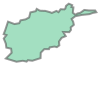

In [74]:
gdf.iloc[0]['geometry']

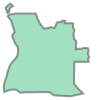

In [75]:
gdf.iloc[1]['geometry']

Are both countries!  But how to find out which ones?

To do that, we have to map the ID's to their [world country codes](https://documentation-resources.opendatasoft.com/explore/dataset/natural-earth-countries-110m/information/).  Luckily, that is [already done for us](https://github.com/alisle/world-110m-country-codes).

In [76]:
country_codes = pd.read_json('https://raw.githubusercontent.com/alisle/world-110m-country-codes/master/world-110m-country-codes.json')

In [77]:
country_codes.head()

,code,id,name
0,AF,4,Afghanistan
1,AL,8,Albania
2,DZ,12,Algeria
3,AO,24,Angola
4,AQ,10,Antarctica


In [78]:
country_codes = country_codes.set_index('id')
country_codes.head()

,code,name
id,,
4,AF,Afghanistan
8,AL,Albania
12,DZ,Algeria
24,AO,Angola
10,AQ,Antarctica


In [79]:
gdf['id'] = gdf['id'].astype('int64')

In [80]:
gdf['id'].head()

0      4
1     24
2      8
3    784
4     32
Name: id, dtype: int64

Let's merge these two tables together by the country ID so that we can get the name.

In [81]:
gdf_comb = gdf.join(country_codes, on='id')

In [82]:
gdf_comb

,id,geometry,code,name
0,4,"POLYGON ((61.20961 35.64925, 62.23202 35.27011...",AF,Afghanistan
1,24,"MULTIPOLYGON (((23.91324 -10.92658, 24.01764 -...",AO,Angola
2,8,"POLYGON ((20.59041 41.85586, 20.46440 41.51565...",AL,Albania
3,784,"POLYGON ((51.57952 24.24479, 51.75592 24.29387...",AE,United Arab Emirates
4,32,"MULTIPOLYGON (((-66.95887 -54.89756, -67.56368...",AR,Argentina
...,...,...,...,...
172,548,"MULTIPOLYGON (((167.51508 -16.59835, 167.18027...",VU,Vanuatu
173,887,"POLYGON ((52.38592 16.38285, 52.19152 15.93771...",YE,Yemen
174,710,"POLYGON ((28.21888 -32.77244, 27.46287 -33.227...",ZA,South Africa
175,894,"POLYGON ((32.75853 -9.23064, 33.23013 -9.67747...",ZM,Zambia


Let's re-load our data to start from "clean":

In [83]:
corgs = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/main/data/corgs_per_country_over_time_columns_2020.csv')

Clean this data with known naming issues:

In [84]:
corg_clean = corgs.rename(columns={'Korea, North':"North Korea",'Netherlands Antilles':"Netherlands"})

And transpose it:

In [85]:
corg_clean_t = corg_clean.set_index('Years').T
corg_clean_t.index.name = 'Country'
corg_clean2 = corg_clean_t.reset_index()
corg_clean2.head()

Years,Country,1917,1918,1919,1920,1921,1922,1923,1924,1925,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,0,0,0,0,0,0,0,0,0,...,408,431,376,280,301,229,213,198,118,2
1,Brazil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Russia,0,0,0,0,0,0,0,0,0,...,89,82,115,127,237,217,260,329,189,16
3,Japan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,0,0,0
4,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3,0,0


We could turn this into a cumulative sum, but instead, let's leave as is this time and focus on making a chorolpeth plot that shows the corgis born *in that year* instead of a cumulative sum.

Now let's see how many of these columns match up with the names that we have in our corgi table:

In [86]:
corg_clean2['Country'].unique()

array(['United States', 'Brazil', 'Russia', 'Japan', 'Vietnam', 'Germany',
       'France', 'United Kingdom', 'Italy', 'South Africa', 'Ukraine',
       'Spain', 'Poland', 'Canada', 'North Korea', 'Romania', 'Australia',
       'Portugal', 'Belgium', 'Czech Republic', 'Hungary', 'Belarus',
       'Sweden', 'Austria', 'Switzerland', 'Israel', 'Serbia', 'Denmark',
       'Finland', 'Norway', 'Croatia', 'New Zealand', 'Ireland',
       'Lithuania', 'Uruguay', 'Latvia', 'Slovenia', 'Estonia',
       'Netherlands', 'Kosovo'], dtype=object)

In [87]:
for c in corg_clean2['Country'].unique():
    if c not in gdf_comb['name'].values:
        print('no',c)

no Russia
no Vietnam
no North Korea
no Kosovo


So, once again, it seems that we are missing some names.  Let's see if we can get close with some fuzzy matching:

In [88]:
gdf_comb['name'].values

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Antarctica',
       'French Southern Territories', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia, Plurinational State of', 'Brazil',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, the Democratic Republic of the', 'Congo', 'Colombia',
       'Costa Rica', 'Cuba', nan, 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'Falkland Islands (Malvinas)', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial

In [89]:
gdf_comb.loc[gdf_comb['name']=='United States']

,id,geometry,code,name
168,840,"MULTIPOLYGON (((-155.68896 18.91661, -155.9373...",US,United States


In [90]:
for c in corg_clean2['Country'].unique():
    if c not in gdf_comb['name'].values: # if not in there, look for fuzzy
        #print('no',c)
        country_match = []
        for cc in gdf_comb['name'].values:
            #if c in cc: # there is an NaN
            if type(cc)==str:
                c2 = "".join(c.split()).lower()
                cc2 = "".join(cc.split()).lower()
                if c2 in cc2:
                    country_match.append(cc)
                    print(c,cc)
        if len(country_match) >0:
            print('found', country_match, 'for',c)
        else:
            print('no match',c)
                

Russia Russian Federation
found ['Russian Federation'] for Russia
Vietnam Viet Nam
found ['Viet Nam'] for Vietnam
no match North Korea
no match Kosovo


In [91]:
# store these names to be the same as in our dataset
for c in corg_clean2['Country'].unique():
    if c not in gdf_comb['name'].values: # if not in there, look for fuzzy
        #print('no',c)
        country_match = []
        for cc in gdf_comb['name'].values:
            #if c in cc: # there is an NaN
            if type(cc)==str:
                c2 = "".join(c.split()).lower()
                cc2 = "".join(cc.split()).lower()
                if c2 in cc2:
                    country_match.append(cc)
                    #print(c,cc)
        if len(country_match) >0:
            print('found', country_match, 'for',c)
            if len(country_match)==1: # only one
                gdf_comb.loc[gdf_comb['name']==country_match[0],'name'] = c # replace
        else:
            print('no match',c)

found ['Russian Federation'] for Russia
found ['Viet Nam'] for Vietnam
no match North Korea
no match Kosovo


Missing ids for North Korea and Kosovo, in our original corgi dataset, but let's add the IDs that we can to our corgi dataset:

In [92]:
corg_clean2.join?

In [93]:
corg_join = corg_clean2.reset_index().merge(gdf_comb,right_on='name',left_on='Country')

In [94]:
corg_join.head()

,index,Country,1917,1918,1919,1920,1921,1922,1923,1924,...,2015,2016,2017,2018,2019,2020,id,geometry,code,name
0,0,United States,0,0,0,0,0,0,0,0,...,301,229,213,198,118,2,840,"MULTIPOLYGON (((-155.68896 18.91661, -155.9373...",US,United States
1,1,Brazil,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,76,"POLYGON ((-57.62398 -30.21667, -56.29196 -28.8...",BR,Brazil
2,2,Russia,0,0,0,0,0,0,0,0,...,237,217,260,329,189,16,643,"MULTIPOLYGON (((142.09162 45.96708, 141.90802 ...",RU,Russia
3,3,Japan,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,392,"MULTIPOLYGON (((133.01593 32.70419, 132.36432 ...",JP,Japan
4,4,Vietnam,0,0,0,0,0,0,0,0,...,0,0,1,3,0,0,704,"POLYGON ((108.04968 21.55193, 106.71407 20.697...",VN,Vietnam


Now that we have merged everything together, let's simplify this table a bit.  We know that we want a year slider, so let's change our columns from datetime to years:

In [95]:
corg_join_small = corg_join.copy()
corg_join_small = corg_join_small.drop(['index','code','name','geometry'],axis=1)
corg_join_small.head()

,Country,1917,1918,1919,1920,1921,1922,1923,1924,1925,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,id
0,United States,0,0,0,0,0,0,0,0,0,...,431,376,280,301,229,213,198,118,2,840
1,Brazil,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76
2,Russia,0,0,0,0,0,0,0,0,0,...,82,115,127,237,217,260,329,189,16,643
3,Japan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,0,0,0,392
4,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,0,0,704


Before making this interactive in anyway, let's first make a static plot.  This will help us explore [some of the transformations that we need to do](https://stackoverflow.com/questions/59224026/how-to-add-a-slider-to-a-choropleth-in-altair) to get this whole thing to work.

Let's start with a black-background map:

In [108]:
world = alt.topo_feature(data.world_110m.url, "countries")

background = alt.Chart(world).mark_geoshape(fill="black").project("equirectangular")
background

alt.Chart(...)

Let's add the forground, and in this case, just pick one year to plot.  To select this year, let's first change the type of our columns:

In [109]:
corg_join_small.columns

Index(['Country', '1917', '1918', '1919', '1920', '1921', '1922', '1923',
       '1924', '1925',
       ...
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'id'],
      dtype='object', length=106)

In [110]:
corg_join_small.columns = corg_join_small.columns.astype('str')

In [111]:
corg_join_small.columns

Index(['Country', '1917', '1918', '1919', '1920', '1921', '1922', '1923',
       '1924', '1925',
       ...
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       'id'],
      dtype='object', length=106)

In [112]:
corg_join_small_2019 = corg_join_small[['Country','2019','id']]
corg_join_small_2019.head()

,Country,2019,id
0,United States,118,840
1,Brazil,0,76
2,Russia,189,643
3,Japan,0,392
4,Vietnam,0,704


In [113]:
foreground = alt.Chart(world).mark_geoshape(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(corg_join_small_2019, 'id', columns)
).encode(
    color = alt.Color('2019:Q', scale=alt.Scale(scheme='blues'))
)
background+foreground

alt.LayerChart(...)

Next, let's use a [transform_fold](https://altair-viz.github.io/user_guide/transform/fold.html) operation to "unwrap" our data into a `year` variable and a `Corgs_Born` variable.  This is very similar to the "melting" operations we did above, but now, it will be done "on the fly" in vega-lite/Altair with each year selection.

To do that, we need to specify which columns to use.  In our current case, we just have the 2019 column as what we want to transform by "folding":

In [114]:
columns = ['2019']

In [115]:
foreground = alt.Chart(world).mark_geoshape(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(corg_join_small_2019, 'id', columns)
).transform_fold( # this is so that we can do continuous updates
    columns, as_=['year', 'Corgs_Born']
).encode(
    color = alt.Color('Corgs_Born:Q', scale=alt.Scale(scheme='blues'))
)
background+foreground

alt.LayerChart(...)

So, this works for one year, but we want multiple years.  For this we need a slider like we had above:

In [116]:
slider = alt.binding_range(min=1917, max=2020, step=1, name='Year: ')
select_year = alt.selection_single(name="year", fields=['year'], # will operate on a "year" variable calculated "on the fly"
                                   bind=slider, init={'year': 2006})

Which years columns to use now?  Well, all of them!

In [117]:
columns = [str(year) for year in range(1917, 2022)]
columns = np.array(columns).astype('str')
columns[:5]

array(['1917', '1918', '1919', '1920', '1921'], dtype='<U4')

In [118]:
foreground = alt.Chart(world).mark_geoshape(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(corg_join_small, 'id', columns)
).transform_fold( # this is so that we can do continuous updates
    columns, as_=['year', 'Corgs_Born']
).encode(
    color = alt.Color('Corgs_Born:Q', scale=alt.Scale(scheme='blues'))
).add_selection(
    select_year
).transform_filter(
    select_year
)
background+foreground

alt.LayerChart(...)

But wait!  That doesn't work how we think it should... as we can see by the colorbar -- we are getting NaN's.  That is because as discussed above, the slider is expecting integers and `year` is a string.  We got around this before by having an `year_int` column, but now we want to do this "on the fly" -- we can accomplish this by adding another transformation to our Altair specs:

In [119]:
foreground = alt.Chart(world).mark_geoshape(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(corg_join_small, 'id', columns)
).transform_fold( # this is so that we can do continuous updates
    columns, as_=['year', 'Corgs_Born']
).transform_calculate(
    year='parseInt(datum.year)',
).encode(
    color = alt.Color('Corgs_Born:Q', scale=alt.Scale(scheme='blues'))
).add_selection(
    select_year
).transform_filter(
    select_year
)
background+foreground

alt.LayerChart(...)

Nice!  One last thing -- let's make it a bit bigger and maybe change the colormap:

In [124]:
foreground = alt.Chart(world).mark_geoshape(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(corg_join_small, 'id', columns)
).transform_fold( # this is so that we can do continuous updates
    columns, as_=['year', 'Corgs_Born']
).transform_calculate(
    year='parseInt(datum.year)',
).encode(
    color = alt.Color('Corgs_Born:Q', scale=alt.Scale(scheme='viridis')),
).add_selection(
    select_year
).transform_filter(
    select_year
)
choro_corg = (background+foreground).properties(
    width=700,
    height=400
)
choro_corg

alt.LayerChart(...)

I lied!  One last-last thing, [let's add in our tooltip](https://stackoverflow.com/questions/65987572/adding-dynamic-tooltip-and-title-to-choropleth-with-slider-in-altair):

In [ ]:
foreground = alt.Chart(world).mark_geoshape(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(corg_join_small, 'id', columns)
).transform_fold( # this is so that we can do continuous updates
    columns, as_=['year', 'Corgs_Born']
).transform_calculate(
    year='parseInt(datum.year)',
).encode(
    color = alt.Color('Corgs_Born:Q', scale=alt.Scale(scheme='viridis')),
).add_selection(
    select_year
).transform_filter(
    select_year
)
choro_corg = (background+foreground).properties(
    width=700,
    height=400
)
choro_corg

In [125]:
foreground = alt.Chart(world).mark_geoshape(
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(corg_join_small, 'id', columns+['Country']) # add country
).transform_fold( # this is so that we can do continuous updates
    columns, as_=['year', 'Corgs_Born'] # add in country
).transform_calculate(
    year='parseInt(datum.year)',
).encode(
    color = alt.Color('Corgs_Born:Q', scale=alt.Scale(scheme='viridis')),
    #tooltip=['Country:N','Corgs_Born:Q'] # data types might not be necessary
).add_selection(
    select_year
).transform_filter(
    select_year
)
choro_corg = (background+foreground).properties(
    width=700,
    height=400
)
choro_corg

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U4'), dtype('<U7')) -> None

Let's save it with a contain width tag!

In [ ]:
chart_out = background+foreground

chart_out.properties(width='container').save(myJekyllDir+"assets/json/corgis_choro_world.json") 

## Optional:

Maybe try saving with HTML just as an example? https://altair-viz.github.io/user_guide/saving_charts.html

https://stackoverflow.com/questions/59224026/how-to-add-a-slider-to-a-choropleth-in-altair